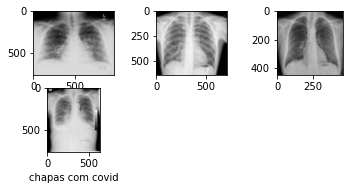

In [4]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'C:/Users/qualquer/Downloads/covid/train/covid/'
# plot first few images
for i in range(4):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + '000001-'+str(i+1)+'.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.xlabel('chapas com covid')
pyplot.show()

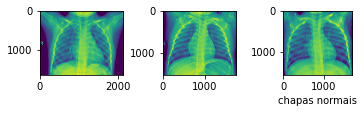

In [5]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'C:/Users/qualquer/Downloads/covid/train/normal/'
# plot first few images
for i in range(3):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'NORMAL2-IM-057'+str(i+1)+'-0001'+'.jpeg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.xlabel('chapas normais')
pyplot.show()

Found 1200 images belonging to 2 classes.
Found 258 images belonging to 2 classes.
Epoch 1/20
19/19 [==============================] - 530s 28s/step - loss: 0.5602 - accuracy: 0.7200 - val_loss: 0.1680 - val_accuracy: 0.9302
Epoch 2/20
19/19 [==============================] - 509s 27s/step - loss: 0.1967 - accuracy: 0.9233 - val_loss: 0.1035 - val_accuracy: 0.9651
Epoch 3/20
19/19 [==============================] - 513s 27s/step - loss: 0.1374 - accuracy: 0.9500 - val_loss: 0.0900 - val_accuracy: 0.9690
Epoch 4/20
19/19 [==============================] - 510s 27s/step - loss: 0.1222 - accuracy: 0.9517 - val_loss: 0.1047 - val_accuracy: 0.9535
Epoch 5/20
19/19 [==============================] - 510s 27s/step - loss: 0.1095 - accuracy: 0.9625 - val_loss: 0.0742 - val_accuracy: 0.9690
Epoch 6/20
19/19 [==============================] - 507s 27s/step - loss: 0.1028 - accuracy: 0.9625 - val_loss: 0.0685 - val_accuracy: 0.9690
Epoch 7/20
19/19 [==============================] - 512s 27s/step

C:\Users\qualquer\AppData\Local\Temp\ipykernel_8240\1307627277.py:46: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=1)


5/5 [==============================] - 36s 6s/step - loss: 0.0452 - accuracy: 0.9806
> 98.062


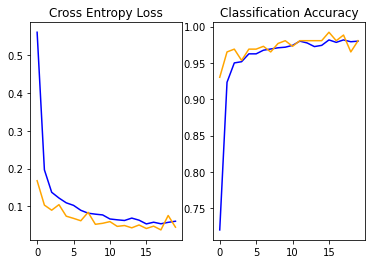

In [5]:
# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.1))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',
padding='same'))
model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.1))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',
padding='same'))
model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
# compile model
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
# run the test harness for evaluating a model
# create data generator
datagen = ImageDataGenerator(rescale=1.0/255.0)
# prepare iterators
train_it = datagen.flow_from_directory('C:/Users/qualquer/Downloads/covid/train/',class_mode='binary', 
                                       batch_size=64, target_size=(224, 224))
test_it = datagen.flow_from_directory('C:/Users/qualquer/Downloads/covid/test/',class_mode='binary', 
                                      batch_size=64, target_size=(224, 224))
# fit model
history = model.fit(train_it,steps_per_epoch=len(train_it),validation_data=test_it, 
validation_steps=len(test_it), epochs=20, verbose=1)  
# evaluate model
_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=1)
print('> %.3f' % (acc * 100.0))
model.save('C:/Users/qualquer/Downloads/covid/final_covid_model_1.h5')
# plot diagnostic learning curves
# plot loss
pyplot.subplot(121)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(122)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
# save plot to file
#filename = sys.argv[0].split('/')[-1]
#pyplot.savefig(filename + '_plot.png')
pyplot.show()

In [3]:
import tensorflow
import matplotlib.pyplot

In [2]:
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# save the final model to file
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# run the test harness for evaluating a model
def run_test_harness():
# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# prepare iterator
	train_it = datagen.flow_from_directory('C:/Users/qualquer/Downloads/covid/train',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	# fit model
	model.fit(train_it, steps_per_epoch=len(train_it), epochs=10, verbose=1)
	# save model
	model.save('C:/Users/qualquer/Downloads/dogs_and_cats/final_model_2.h5')

# entry point, run the te/t harness
run_test_harness()

Found 1200 images belonging to 2 classes.
Epoch 1/10


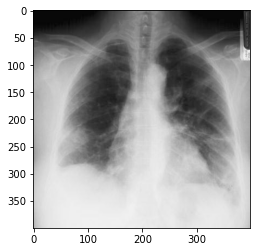

1/1 [==============================] - 1s 515ms/step
[0.]
covid


In [7]:
# make a prediction for a new image.
#from keras.preprocessing.image import load_img
#from keras.preprocessing.image import img_to_array
from matplotlib import pyplot
from matplotlib.image import imread
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# load and prepare the image
folder = 'C:/Users/qualquer/Downloads/covid/'
#filename='C:/Users/qualquer/Downloads/covid/chapa_normal.jpg'
filename='C:/Users/qualquer/Downloads/covid/chapa_covid.jpg'
# plot first few images
#i = int(input("Informe o número da imagem: "))
i=1
	# define subplot
#pyplot.subplot(330 + 1 + i)
	# define filename
#filename = folder + str(i) + '.jpg'
	# load image pixels
image = imread(filename)
	# plot raw pixel data
pyplot.imshow(image)
# show the figure
pyplot.show()

#filename='C:/Users/qualquer/Downloads/dogs-vs-cats/test1/2.jpg'
	# load the image
img = load_img(filename, target_size=(224, 224))
	# convert to array
img = img_to_array(img)
	# reshape into a single sample with 3 channels
img = img.reshape(1, 224, 224, 3)
	# center pixel data
img = img.astype('float32')
img = img - [123.68, 116.779, 103.939]
# load an image and predict the class
	# load the image
#img = load_image(filename)
#img = load_img(filename)
	# load model
model = load_model('C:/Users/qualquer/Downloads/covid/final_covid_model_1.h5')
	# predict the class
result = model.predict(img)
print(result[0])

# entry point, run the example
#run_example()
prev=result[0]
if prev== 1:
    print ("normal")
else:
    print ("covid")

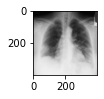

1/1 [==============================] - 1s 1s/step
[0.]


In [6]:
# make a prediction for a new image.
#from keras.preprocessing.image import load_img
#from keras.preprocessing.image import img_to_array
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'C:/Users/qualquer/Downloads/dogs-vs-cats/test1/'
filename='C:/Users/qualquer/Downloads/covid/1.jpg'    #0 chapa normal e 1 chapa covid
# plot first few images
#a = int(input("Informe um número entre 0 e 100: "))
i=0
	# define subplot
pyplot.subplot(330 + 1 + i)
	# define filename
#filename = folder + str(i) + '.jpg'
	# load image pixels
image = imread(filename)
	# plot raw pixel data
pyplot.imshow(image)
# show the figure
pyplot.show()

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(224, 224))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 224, 224, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img

# load an image and predict the class
def run_example():
	# load the image
	img = load_image('C:/Users/qualquer/Downloads/covid/1.jpg')   
    #img = load_image(filename2)   
	# load model
	model = load_model('C:/Users/qualquer/Downloads/covid/final_covid_model_1.h5')
	# predict the class
	result = model.predict(img)
	print(result[0])
# entry point, run the example
#prev=result[0]
#if prev== 0:
#    print ("cat")
#else:
#    print ("dog")
run_example()

Found 1200 images belonging to 2 classes.
Found 258 images belonging to 2 classes.
Epoch 1/10
19/19 [==============================] - 523s 26s/step - loss: 1.5321 - accuracy: 0.6200 - val_loss: 0.6592 - val_accuracy: 0.9302
Epoch 2/10
19/19 [==============================] - 451s 24s/step - loss: 0.5152 - accuracy: 0.7733 - val_loss: 0.5542 - val_accuracy: 0.9419
Epoch 3/10
19/19 [==============================] - 446s 23s/step - loss: 0.3754 - accuracy: 0.8558 - val_loss: 0.4236 - val_accuracy: 0.9574
Epoch 4/10
19/19 [==============================] - 448s 23s/step - loss: 0.3346 - accuracy: 0.8775 - val_loss: 0.3731 - val_accuracy: 0.9380
Epoch 5/10
19/19 [==============================] - 447s 23s/step - loss: 0.3227 - accuracy: 0.8792 - val_loss: 0.3488 - val_accuracy: 0.9496
Epoch 6/10
19/19 [==============================] - 448s 23s/step - loss: 0.3207 - accuracy: 0.8833 - val_loss: 0.3134 - val_accuracy: 0.9651
Epoch 7/10
19/19 [==============================] - 449s 23s/step

C:\Users\qualquer\AppData\Local\Temp\ipykernel_10204\510069760.py:58: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=1)


5/5 [==============================] - 30s 5s/step - loss: 0.2947 - accuracy: 0.9574
> 95.736


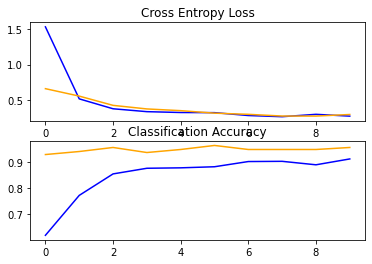

In [18]:
# baseline model with data augmentation for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
#def define_model():
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
	# compile model
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
#	return model

# plot diagnostic learning curves
#def summarize_diagnostics(history):
	# plot loss
	# save plot to file
#	filename = sys.argv[0].split('/')[-1]
#	pyplot.savefig(filename + '_plot.png')
#pyplot.close()

# run the test harness for evaluating a model
#def run_test_harness():
	# define model
#	model = define_model()
	# create data generators
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
	width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=False)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
train_it = train_datagen.flow_from_directory('C:/Users/qualquer/Downloads/covid/train',
	class_mode='binary', batch_size=64, target_size=(224, 224))
test_it = test_datagen.flow_from_directory('C:/Users/qualquer/Downloads/covid/test',
	class_mode='binary', batch_size=64, target_size=(224, 224))
	# fit model
history = model.fit(train_it, steps_per_epoch=len(train_it),validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
	# evaluate model
_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=1)
print('> %.3f' % (acc * 100.0))
	# learning curves
#	summarize_diagnostics(history)

# entry point, run the test harness
#run_test_harness()
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

In [ ]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
#	filename = sys.argv[0].split('/')[-1]
#	pyplot.savefig(filename + '_plot.png')
#	pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# prepare iterator
	train_it = datagen.flow_from_directory('C:/Users/qualquer/Downloads/covid/train/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	test_it = datagen.flow_from_directory('C:/Users/qualquer/Downloads/covid/test/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	# fit model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=5, verbose=1)
	# evaluate model
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=1)
	print('> %.3f' % (acc * 100.0))
    

	model.save('C:/Users/qualquer/Downloads/covid/final_model_2.h5')
    	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

Found 1200 images belonging to 2 classes.
Found 258 images belonging to 2 classes.


C:\Users\qualquer\AppData\Local\Temp\ipykernel_10520\802774798.py:61: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_it, steps_per_epoch=len(train_it),


Epoch 1/5
